In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame({
    "student" : ["A", "B", "C"],
    "iPDI" : [65, 75, 85],
    "PDI1" : [62, 72, 52],
    "PDI2" : [54, 64, 74]
})

df.T

,0,1,2
student,A,B,C
iPDI,65,75,85
PDI1,62,72,52
PDI2,54,64,74


In [47]:
import seaborn as sns

df_t = sns.load_dataset("titanic")

In [48]:
df_t.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
sibsp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75
embarked,S,C,S,S,S,Q,S,S,S,C,...,S,S,S,S,Q,S,S,S,C,Q
class,Third,First,Third,First,Third,Third,First,Third,Third,Second,...,Third,Third,Second,Third,Third,Second,First,Third,First,Third
who,man,woman,woman,woman,man,man,man,child,woman,child,...,man,woman,man,man,woman,man,woman,woman,man,man


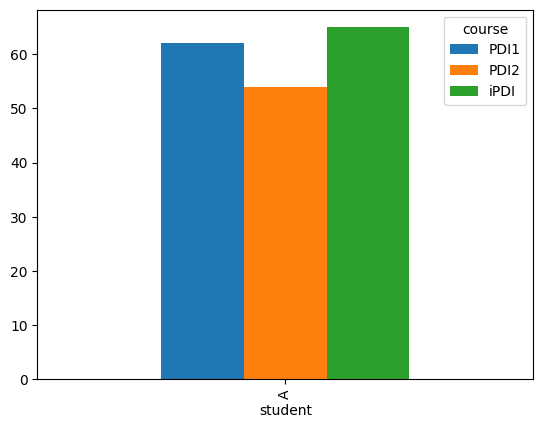

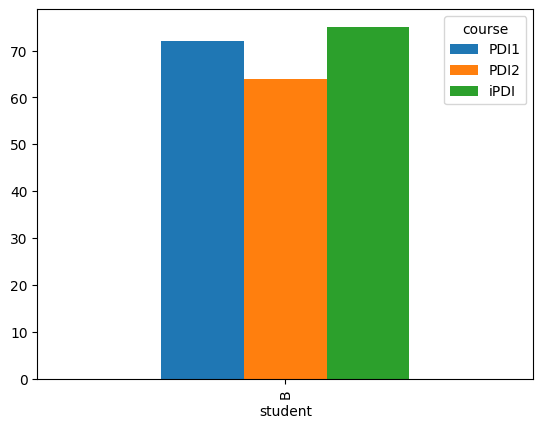

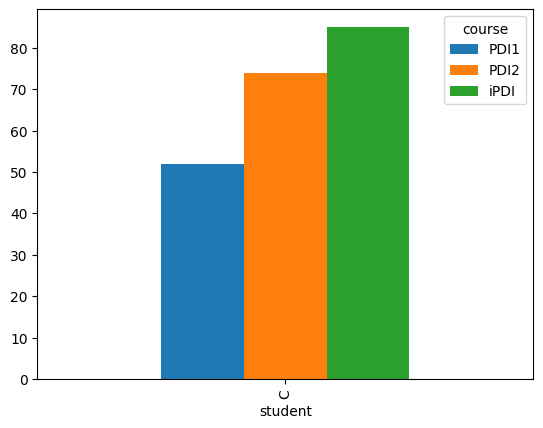

In [49]:
long = df.melt(id_vars="student", var_name="course", value_name="score")
xx = long.pivot(index="student", columns="course", values="score").groupby("student").plot(kind="bar")

<Axes: xlabel='student'>

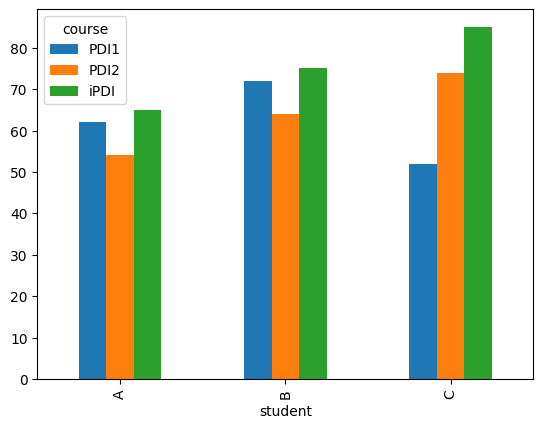

In [50]:
long.groupby(["student", "course"])["score"].mean().unstack().plot(kind="bar")

In [51]:
df = pd.DataFrame({
    "student" : ["A", "B", "C", "D"],
    "iPDI" : [65, 75, 85, 64],
    "PDI1" : [62, 72, 52, 32],
    "PDI2" : [54, 64, 74, 76],
    "major" : ["Humanities", "CS", "Physics", "Politics"]
})

df.head()

,student,iPDI,PDI1,PDI2,major
0,A,65,62,54,Humanities
1,B,75,72,64,CS
2,C,85,52,74,Physics
3,D,64,32,76,Politics


In [52]:
df = df.melt(
    id_vars = ["student", "major"],
    value_vars= ["iPDI", "PDI1", "PDI2"],
    var_name= "course",
    value_name="marks"
)

In [53]:
df.pivot(index = ["student", "major"], columns= "course", values= "marks")

,course,PDI1,PDI2,iPDI
student,major,,,
A,Humanities,62,54,65
B,CS,72,64,75
C,Physics,52,74,85
D,Politics,32,76,64


<Axes: xlabel='major'>

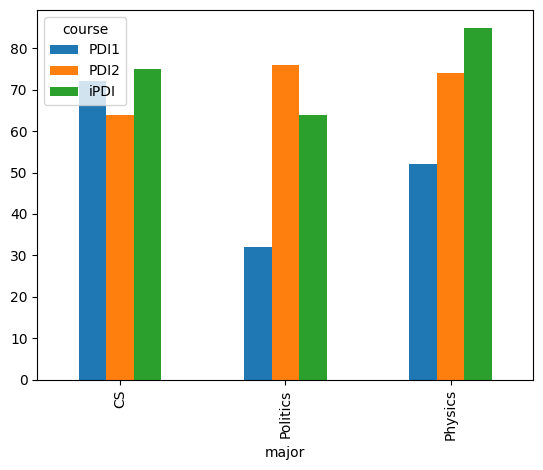

In [70]:
df.groupby(["major", "course"])["marks"].mean()[["CS", "Politics", "Physics"]].unstack().plot(kind="bar")

In [66]:
df[(df["major"] == "CS") | (df["major"] == "Politics")].groupby(["major", "course"])["marks"].mean()

major     course
CS        PDI1      72.0
          PDI2      64.0
          iPDI      75.0
Politics  PDI1      32.0
          PDI2      76.0
          iPDI      64.0
Name: marks, dtype: float64